In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime,timedelta,date

In [2]:
df=pd.read_csv("D:/从c盘转移的桌面/github/User Behavior Analysis Python Project/customer_behavior2.csv")

In [3]:
data=df[['cust_id','prod_id','group_id','be_type','day_id','buy_time']]

In [4]:
data['day_id']=pd.to_datetime(data['day_id'])
data['buy_time']=pd.to_datetime(data['buy_time'])

c:\Users\HUAWEI\anaconda3\envs\risk_ctrl\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\HUAWEI\anaconda3\envs\risk_ctrl\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
data1=data[(data.buy_time>='2019-11-05')&(data.buy_time<='2019-11-13')]
data1['month']=data1['day_id'].dt.month
data1['times']=data1['day_id'].dt.time
data1['hours']=data1['day_id'].dt.hour
data1['weekday']=data1['day_id'].dt.dayofweek+1

c:\Users\HUAWEI\anaconda3\envs\risk_ctrl\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\HUAWEI\anaconda3\envs\risk_ctrl\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\HUAWEI\anaconda3\envs\risk_ctrl\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [6]:
behavior_count=data1.groupby('be_type')['cust_id'].count()
behavior_count

be_type
buy       3385
cart      9482
fav       5015
pv      152439
Name: cust_id, dtype: int64

In [7]:
#Bounce Rate
PV=behavior_count['pv']
UV=len(data1['cust_id'].unique())
PV/UV

2.2537478931961323

In [8]:
#number of four types customers
data_pv=data1.loc[data1['be_type']=='pv',['cust_id']]
data_fav = data1.loc[data1['be_type']=='fav',['cust_id']]
data_cart = data1.loc[data1['be_type']=='cart',['cust_id']]
data_buy = data1.loc[data1['be_type']=='buy',['cust_id']]
data_pv

,cust_id
1,115381
2,136001
3,138753
4,142217
5,128124
...,...
170396,1012514
170397,129833
170398,1008512
170399,1001615


In [9]:
data_pv_only = set(data_pv['cust_id'])-set(data_fav['cust_id'])-set(data_cart['cust_id'])-set(data_buy['cust_id'])
set(data_pv['cust_id'])

{131072,
 131074,
 131075,
 131076,
 131078,
 131079,
 131080,
 131081,
 131082,
 131083,
 131084,
 131086,
 131087,
 131088,
 131089,
 131093,
 131097,
 131103,
 131105,
 131106,
 131107,
 131108,
 131109,
 131110,
 131111,
 131112,
 131114,
 131116,
 131118,
 131119,
 131120,
 131121,
 131122,
 131123,
 131124,
 131127,
 131128,
 131129,
 131131,
 131132,
 131135,
 131136,
 131138,
 131140,
 131141,
 131142,
 131144,
 131146,
 131147,
 131148,
 131149,
 131150,
 131151,
 131153,
 131155,
 131156,
 131158,
 131161,
 131162,
 131163,
 131164,
 131166,
 131168,
 131171,
 131173,
 131174,
 131176,
 131178,
 131179,
 131180,
 131182,
 131183,
 131184,
 111,
 114,
 115,
 131188,
 117,
 131190,
 131191,
 131192,
 131193,
 131194,
 116,
 131196,
 131197,
 131201,
 131203,
 131204,
 131206,
 131207,
 131208,
 131211,
 131212,
 131214,
 131215,
 131216,
 131224,
 131227,
 131229,
 131231,
 131232,
 131233,
 131236,
 131237,
 131239,
 131241,
 131242,
 131244,
 131245,
 131247,
 131248,
 131251

In [10]:
pv_day=data1[data1.be_type=='pv'].groupby('buy_time')['be_type'].count()#how many pv customers in different time periods

In [11]:
uv_day = data1[data1.be_type=='pv'].drop_duplicates(['cust_id','buy_time']).groupby('buy_time')['be_type'].count()
#Click-through Rate in different time periods after drop duplicated pv customer

In [12]:
x_label=pv_day.index
value1=pv_day.values
value2=uv_day.values

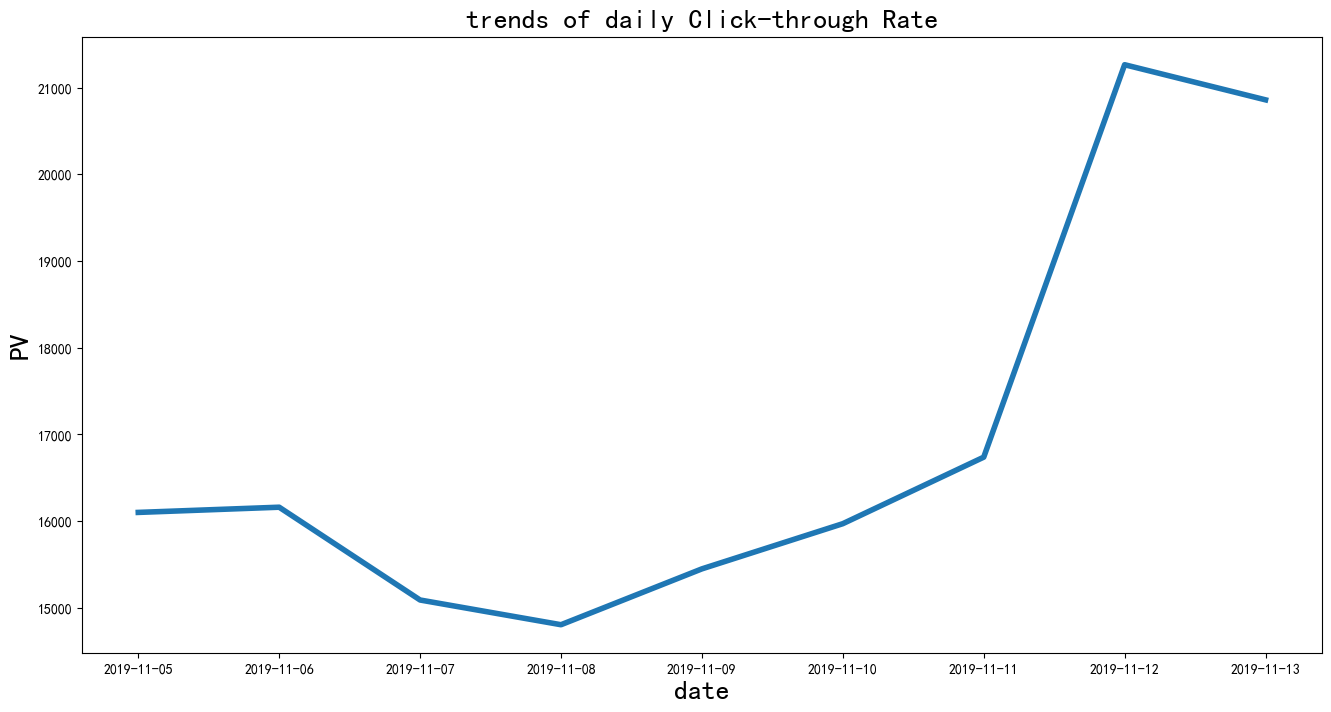

In [13]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(16,8))
plt.plot(x_label,value1,linewidth=4)
plt.title('trends of daily Click-through Rate',fontsize=20)
plt.xlabel('date',fontsize=20)
plt.ylabel('PV',fontsize=20)
plt.show()

In [14]:
date=pd.Series(data1.buy_time.unique()).sort_values()[:-7]

pv_hour=data1.groupby('hours')['cust_id'].count().reset_index().rename(columns={'用户ID':'pv'})
uv_hour = data1.groupby('hours')['cust_id'].apply(lambda x: x.drop_duplicates().count()).reset_index().rename(columns={'用户ID':'UV'})


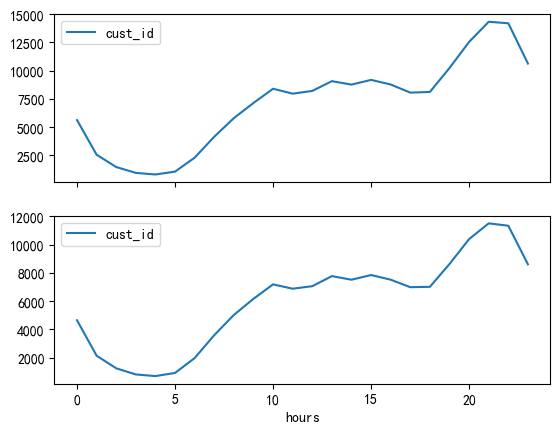

In [15]:
fig,axes=plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hours',y='cust_id',ax=axes[0])
uv_hour.plot(x='hours',y='cust_id',ax=axes[1])
plt.show()

In [16]:
date = pd.Series(data1.buy_time.unique()).sort_values()[:-3]

In [17]:
# Retention Rate Calculation
def cal_retention(data, n):
    user = []  # Used to save registered users
    date = pd.Series(data.buy_time.unique()).sort_values()[:-n]  # Calculate how many days the n-day retention can be calculated
    retention_rates = []  # Prepare a list to save the calculated retention rates
    for i in date:
        new_user = set(data[data.buy_time == i].cust_id.unique()) - set(user)  # Identify new users for each day
        user.extend(new_user)  # Add new users to the list
        user_nday = data[data.buy_time == i + timedelta(n)].cust_id.unique()
        a = 0
        for cust_id in user_nday:
            if cust_id in new_user:
                a += 1
        retention_rate = a / len(new_user)
        retention_rates.append(retention_rate)
    data_retention = pd.Series(retention_rates, index=date)
    return data_retention

# print(cal_retention(data1, 5))


In [18]:
day_buy_user_num = data1[data1.be_type == 'buy'].drop_duplicates(['cust_id', 'buy_time']).groupby('buy_time')['cust_id'].count()
# how many people buy every day
day_active_user_num = data1.drop_duplicates(['cust_id', 'buy_time']).groupby('buy_time')['cust_id'].count()
# how many people active every day
day_buy_rate = day_buy_user_num / day_active_user_num
# buy ratio
print(day_buy_user_num)

buy_time
2019-11-05    340
2019-11-06    374
2019-11-07    348
2019-11-08    333
2019-11-09    366
2019-11-10    382
2019-11-11    361
2019-11-12    435
2019-11-13    401
Name: cust_id, dtype: int64


In [19]:
attr = day_buy_user_num.index
v1 = day_buy_user_num.values
v2 = day_buy_rate.values

Text(0, 0.5, 'PV')

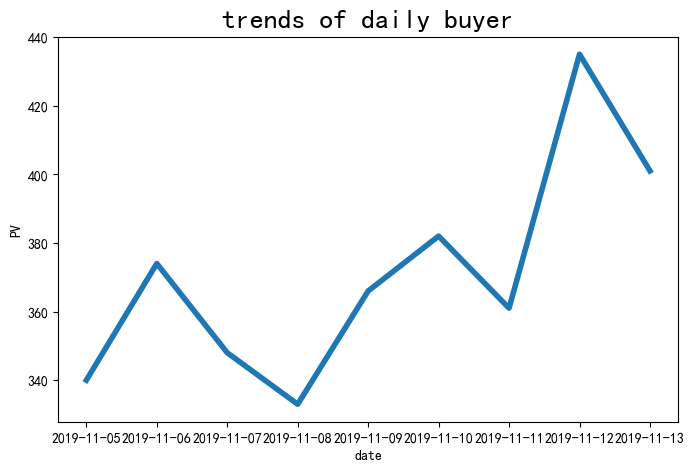

In [20]:
#number of buyers in different time
plt.figure(figsize=(8, 5))
plt.plot(attr,v1,linewidth=4)
plt.title("trends of daily buyer",fontsize=20)
plt.xlabel('date',fontsize=10)
plt.ylabel('PV',fontsize=10)

Text(0, 0.5, 'PV')

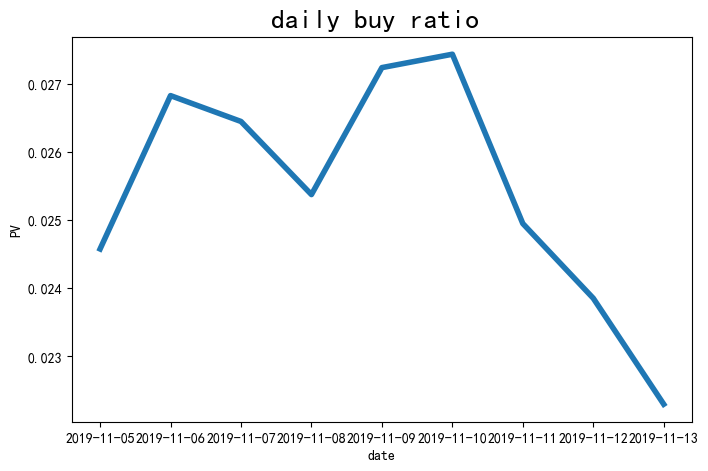

In [21]:
#active buyers in different time
plt.figure(figsize=(8, 5))
plt.plot(attr,v2,linewidth=4)
plt.title("daily buy ratio ",fontsize=20)
plt.xlabel('date',fontsize=10)
plt.ylabel('PV',fontsize=10)

In [22]:
df_rebuy=data1[data1.be_type=='buy'].drop_duplicates(['cust_id','day_id']).groupby('cust_id')['day_id'].count()
df_rebuy[df_rebuy>=2].count()/df_rebuy.count()

0.034779932286857496

In [23]:
# Conversion Rate Calculation
data_AARR = data1.groupby('be_type')['cust_id'].count()
print(data_AARR)
# Click Volume
pv_value = data_AARR['pv']
# Favorites Volume
fav_value = data_AARR['fav']
# Cart Volume
cart_value = data_AARR['cart']
# Purchase Volume
buy_value = data_AARR['buy']
# Favorites + Cart
f_c_value = fav_value + cart_value
# Favorites + Cart Conversion Rate
f_c_ratio = f_c_value / pv_value
# Purchase Conversion Rate
buy_ratio = buy_value / pv_value
print('Favorites + Cart Conversion Rate:', f_c_ratio * 100)
print('Purchase Conversion Rate:', buy_ratio * 100)

be_type
buy       3385
cart      9482
fav       5015
pv      152439
Name: cust_id, dtype: int64
Favorites + Cart Conversion Rate: 9.510033521605363
Purchase Conversion Rate: 2.220560355289657


In [24]:
pv_users = data1[data1.be_type == 'pv']['cust_id'].count()
fav_users = data1[data1.be_type == 'fav']['cust_id'].count()
cart_users =data1[data1.be_type == 'cart']['cust_id'].count()
buy_users = data1[data1.be_type == 'buy']['cust_id'].count()
attr = ['Click', 'Cart', 'Save', 'Buy']

In [25]:
!pip install plotly
import plotly.express as px

In [26]:
data = dict(
    number=[pv_users, cart_users, fav_users, buy_users],
    stage=attr)

In [27]:
fig = px.funnel(data, x='number', y='stage')
fig.show()

In [28]:
product_buy=data1.loc[data1['be_type']=='buy',['cust_id','group_id']]
product_buy_count=product_buy.groupby('group_id')['cust_id'].count().rename('sale number')
product_buy_count=pd.DataFrame(product_buy_count)
product_buy_count=product_buy_count.sort_values(by='sale number',axis=0,ascending=False)
print(product_buy_count)

          sale number
group_id             
2735567            59
1464217            56
2885743            55
4756206            51
4801527            42
...               ...
2085994             1
2087698             1
2106174             1
2108632             1
5149827             1

[1142 rows x 1 columns]
